<font size = "+3"><b> Traffic Crashes - Crashes </b> </font>

##### <font color = 'gray'> <i> Dataset Source</i></font>

https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

                                                        Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

                                                    Upload DataFrame

In [ ]:
dfc = pd.read_csv('Traffic_Crashes_-_Crashes.csv', low_memory=False)
#dfp = pd.read_csv('Traffic_Crashes_-_People.csv', low_memory=False)

                                                      Functions

In [ ]:
# Drops NaN values from DataFrame
def drop_na_df(dataframe):
    dataframe.dropna(inplace=True)
    return dataframe

#Drops NaN values from specific columns
def drop_na_col(dataframe):
    dataframe.dropna(subset=columns, inplace=True)
    return dataframe

# <font color = 'blue'> Crashes </font>

## <font color = 'green'> Data Exploration</font>

##### DataFrame Head / Tail

<font color = 'gray'> List the first 5 rows of the DataFrame (Crashes) </font>

In [ ]:
dfc.head()

<font color = 'gray'> List the last 5 rows of the DataFrame (Crashes) </font>

In [ ]:
dfc.tail()

##### DataFrame info (Crashes)

<font color = 'gray'> Check for the DataType for each column </font>

In [ ]:
dfc.info()

##### DataFrame Shape

<font color = 'gray'> Size of the DataFrame (rows, columns)

In [ ]:
dfc.shape

##### List of columns

<font color = 'gray'> List all of the columns in the df DataFrame </font>

In [ ]:
dfc_columns = dfc.columns
dfc_columns

In [ ]:
#dfc[(dfc['POSTED_SPEED_LIMIT'] > 0) & (dfc['POSTED_SPEED_LIMIT'] < 65)].hist(figsize=(10,8), bins='auto')

##### Null Values

###### <font color = 'gray'> Show the null values by columns </font>

In [ ]:
dfc.isnull().sum()

##### Duplicate Check

<font color= 'gray'> Check for duplicates </font>

In [ ]:
dfc.duplicated().value_counts()

In [ ]:
#dfc['MOST_SEVERE_INJURY'].corr(dfc['WEATHER_CONDITION'])

## <font color = 'red'> Data Reduction </font>

In this step, we will reduce the unnecessary columns that does not provide value to the analysis.

##### <b>Unnecessary columns at a glance:</b>

- RD_NO
- CRASH_DATE_EST_I
- LANE_CNT
- STREET_NO
- STREET_DIRECTION
- STREET_NAME
- DATE_POLICE_NOTIFIED
- BEAT_OF_OCCURENCE
- SEC_CONTRIBUTORY_CAUSE
- PHOTOS_TAKEN_I
- STATEMENTS_TAKEN_I
- WORKERS_PRESENT_I
- REPORT_TYPE
- INJURIES_UNKNOWN
- INJURIES_TOTAL
- INJURIES_FATAL
- INJURIES_INCAPACITATING
- INJURIES_NON_INCAPACITATING
- INJURIES_REPORTED_NOT_EVIDENT
- INJURIES_NO_INDICATION
- LATITUDE
- LONGITUDE
- LOCATION

##### <b>Essential columns for analysis:</b>

- CRASH_RECORD_ID   <i>>>> Will be essential when merging DataFrame</i>
- CRASH_DATE
- POSTED_SPEED_LIMIT
- TRAFFIC_CONTROL_DEVICE
- DEVICE_CONDITION
- WEATHER_CONDITION
- LIGHTING_CONDITION
- FIRST_CRASH_TYPE
- TRAFFICWAY_TYPE
- ALIGNMENT
- ROADWAY_SURFACE_COND
- ROAD_DEFECT
- CRASH_TYPE
- INTERSECTION_RELATED_I
- NOT_RIGHT_OF_WAY_I
- HIT_AND_RUN_I
- DAMAGE
- PRIM_CONTRIBUTORY_CAUSE
- DOORING_I
- WORK_ZONE_I
- WORK_ZONE_TYPE
- NUM_UNITS
- MOST_SEVERE_INJURY
- CRASH_HOUR
- CRASH_DAY_OF_WEEK
- CRASH_MONTH
- CRASH_YEAR

##### Drop unnecessary columns  <b> <font color='purple'> dfc_col_drop</font></b>

###### <font color = 'gray'>Define a list of columns to drop </font>

In [ ]:
drop_dfc_columns = ['RD_NO',                     
                    'CRASH_DATE_EST_I', 
                    'LANE_CNT', 
                    'STREET_NO', 
                    'STREET_DIRECTION', 
                    'STREET_NAME', 
                    'DATE_POLICE_NOTIFIED', 
                    'BEAT_OF_OCCURRENCE', 
                    'SEC_CONTRIBUTORY_CAUSE',  
                    'PHOTOS_TAKEN_I', 
                    'STATEMENTS_TAKEN_I', 
                    'WORKERS_PRESENT_I', 
                    'INJURIES_UNKNOWN', 
                    'INJURIES_TOTAL', 
                    'INJURIES_FATAL', 
                    'INJURIES_INCAPACITATING', 
                    'INJURIES_NON_INCAPACITATING', 
                    'INJURIES_REPORTED_NOT_EVIDENT', 
                    'INJURIES_NO_INDICATION',
                    'REPORT_TYPE', 
                    'LATITUDE', 
                    'LONGITUDE', 
                    'LOCATION'
                   ]

###### <font color = 'gray'> Drop the list of columns from DataFrame</font> <b>dfc_col_drop</b>

In [ ]:
dfc_col_drop = dfc.drop(columns= drop_dfc_columns, axis=1)

In [ ]:
dfc_col_drop.shape

In [ ]:
print(dfc_col_drop.DOORING_I.unique())

In [ ]:
dfc_col_drop.columns

## <font color = 'red'> Drop Data </font>

##### Null Values <font color='purple'> dfc_na_drop </font>

###### <font color = 'gray'> Show the null values by columns </font>

In [ ]:
dfc_col_drop.isnull().sum()

In [ ]:
dfc_col_drop.shape

###### <font color = 'gray'>Drop NaN values from columns</font> dfc_na_drop

In [ ]:
dfc_na_drop = dfc_col_drop.dropna(subset = ['MOST_SEVERE_INJURY'])

In [ ]:
#dfc_na_drop = dfc_col_drop.dropna(subset = ['INJURIES_TOTAL'])

In [ ]:
dfc_na_drop

In [ ]:
dfc_na_drop.shape

###### <font color = 'gray'> Make all Null values to zero </font>

In [ ]:
dfc_clean = dfc_na_drop.fillna(0, inplace=True)

###### <font color = 'gray'> Sanity check for Null values after applying .fillna() method </font>

In [ ]:
dfc_dropped.isnull().sum()

In [ ]:
dfc_dropped['NUM_UNITS'].value_counts()

## <font color = 'red'> Add / Change Datatype </font>

##### Add Columns

We need to modify and add columns to the DataFrame a bit to extract the most relevant information for our analysis.

###### <font color = 'gray'> Change the CRASH_DATE DataType to DateTime. </font>

In [ ]:
dfc_na_drop['CRASH_DATE'] = pd.to_datetime(dfc_na_drop['CRASH_DATE'])

In [ ]:
dfc_na_drop.info()

###### <font color='gray'> Create a new column CRASH_YEAR that shows the year of the crash per row. </font>

In [ ]:
dfc_dropped['CRASH_YEAR'] = pd.DatetimeIndex(dfc_dropped['CRASH_DATE']).year

In [ ]:
dfc_dropped['CRASH_YEAR']

## Visualizations

<font color = 'gray'> Histogram of all numeric columns in the clean DataFrame (Crashes) </font>

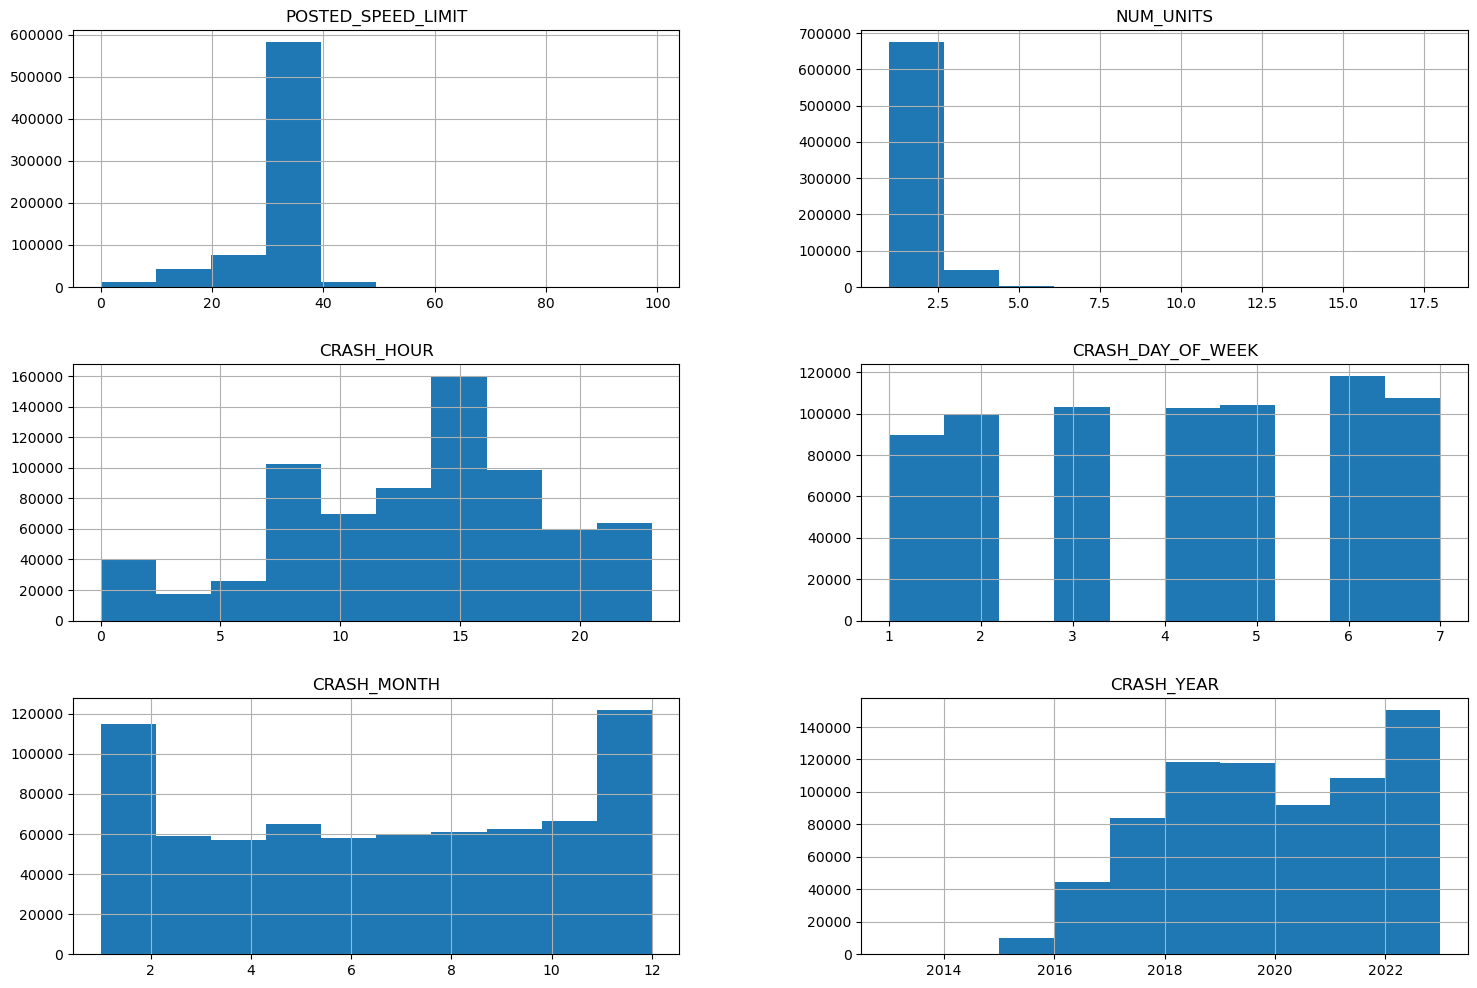

In [38]:
dfc_clean.hist(figsize=(18, 12));

<font color = 'gray'> Bar chart of Injuries </font>

In [39]:
injury_columns = ['INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATIING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'INJURIES_TOTAL']

<BarContainer object of 40 artists>

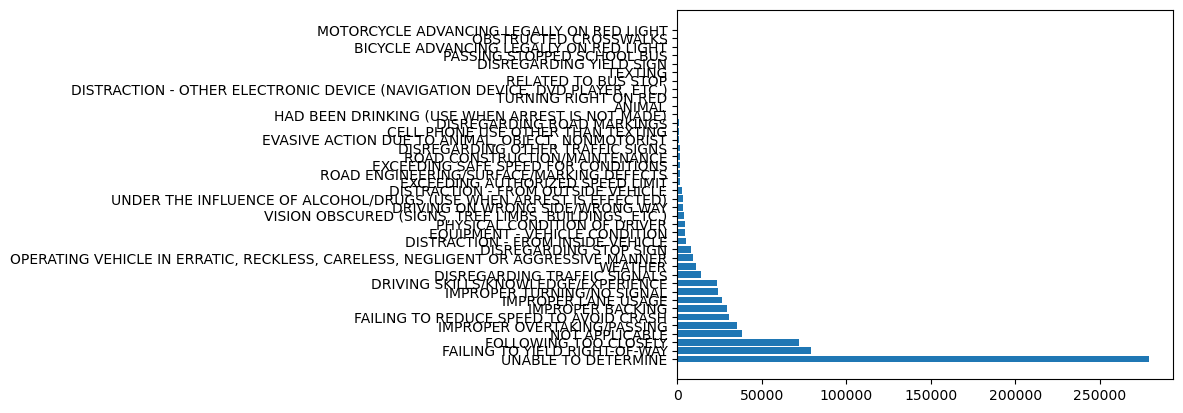

In [40]:
x = dict(dfc_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts()).keys()
y = dict(dfc_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts()).values()

plt.barh(list(x),list(y))

In [41]:
dfc_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 279262
FAILING TO YIELD RIGHT-OF-WAY                                                        79414
FOLLOWING TOO CLOSELY                                                                71948
NOT APPLICABLE                                                                       38087
IMPROPER OVERTAKING/PASSING                                                          35341
FAILING TO REDUCE SPEED TO AVOID CRASH                                               30798
IMPROPER BACKING                                                                     29236
IMPROPER LANE USAGE                                                                  26549
IMPROPER TURNING/NO SIGNAL                                                           24022
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  23770
DISREGARDING TRAFFIC SIGNALS                                                         14076

<AxesSubplot:>

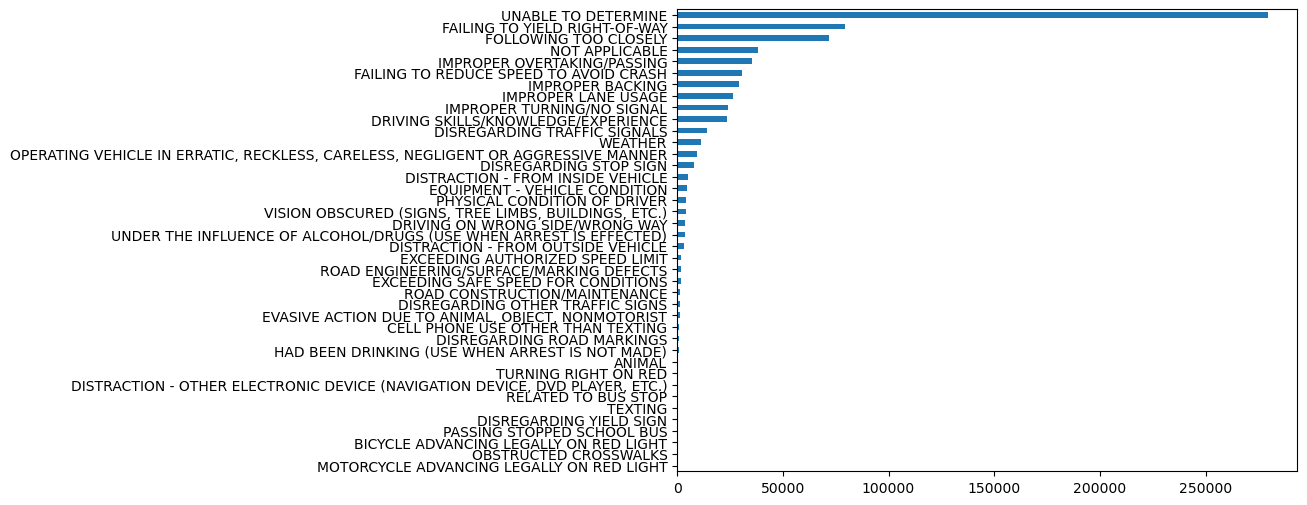

In [42]:
dfc_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts(ascending= True).plot(kind='barh', figsize= (8,6))

<AxesSubplot:>

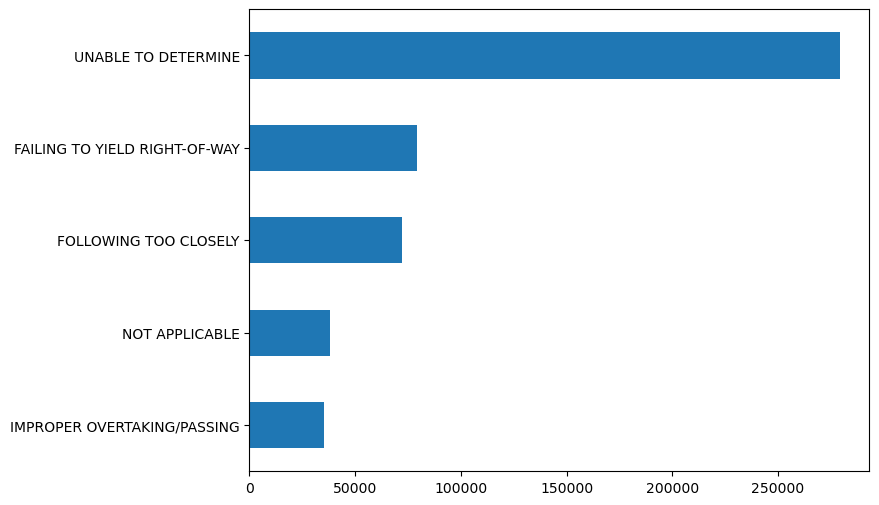

In [43]:
dfc_clean['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head().sort_values().plot(kind='barh', figsize= (8,6))

<AxesSubplot:>

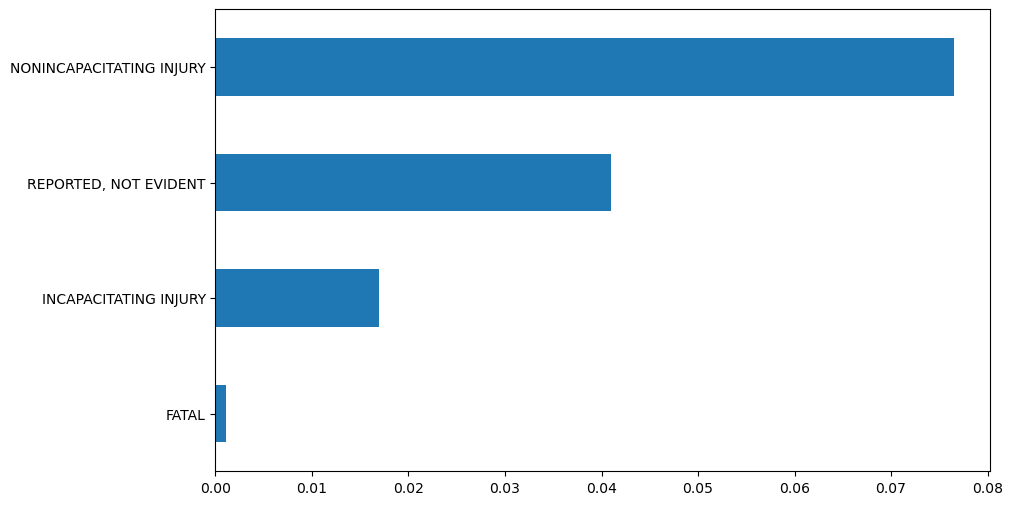

In [44]:
dfc_clean['MOST_SEVERE_INJURY'].value_counts(ascending= True, normalize=True).drop('NO INDICATION OF INJURY').plot(kind='barh', figsize= (10,6))

<font color = 'gray'> Bar Chart showing accidents that occur YoY

<function matplotlib.pyplot.show(close=None, block=None)>

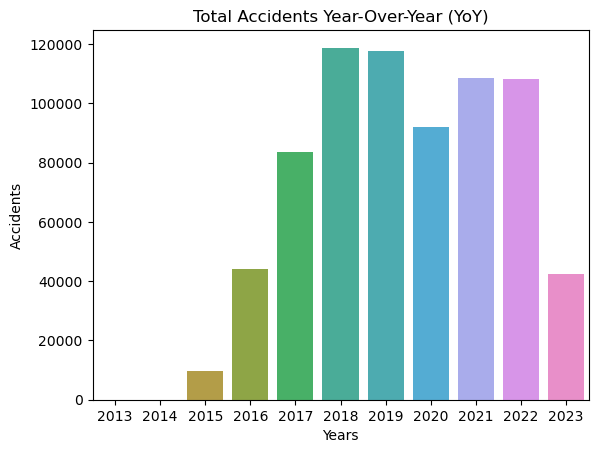

In [45]:
ax = sns.barplot(x=dfc_clean.CRASH_YEAR.astype(str).value_counts().sort_index().index, y=dfc_clean.CRASH_YEAR.astype(str).value_counts().sort_index());

ax.set(xlabel='Years', ylabel= 'Accidents', title = 'Total Accidents Year-Over-Year (YoY)')
plt.show

<font color = 'gray'> Multiple Bar Chart </font>

In [46]:
############### SCRAP

#dfc_clean['LIGHTING_CONDITION'].str.get_dummies()

#injury_lighting = pd.get_dummies(dfc_clean, columns=['LIGHTING_CONDITION']).groupby(['MOST_SEVERE_INJURY'], as_index=False).sum()
#injury_lighting = injury_lighting.drop(columns = ['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_HOUR',
#       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'CRASH_YEAR'], axis=1)
#injury_lighting.set_index('MOST_SEVERE_INJURY')



In [47]:
#crosstab_injuries_lighting = dfc_clean[['LIGHTING_CONDITION', 'MOST_SEVERE_INJURY']].groupby('MOST_SEVERE_INJURY')
#crosstab_injuries_lighting['LIGHTING_CONDITION'].str.get_dummies()

In [48]:
#fig, ax = plt.subplots(figsize = (10,8))
#injury_lighting[['LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 'LIGHTING_CONDITION_DAYLIGHT']].sort_index().plot.bar(ax=ax, color=('gray', 'orange'))
#plt.title('Injuries occurred in Daylight vs Darkness', size=15)
#plt.xlabel('Injury Classification', size = 12)
#plt.ylabel('Proportion of Occurrence', size= 12)
#plt.legend()
#plt.xticks(rotation=45);

##### Data Concatination

###### MOST_SEVERE_INJURY

As seen below, there is a category REPORTED, NOT EVIDENT that should be combined with NONINCAPACITATING INJURY since it is reported, but it cant be classified as NO INDICATION OF INJURY because to exclude all posibilities that the reported injury is not an injury is not correct.

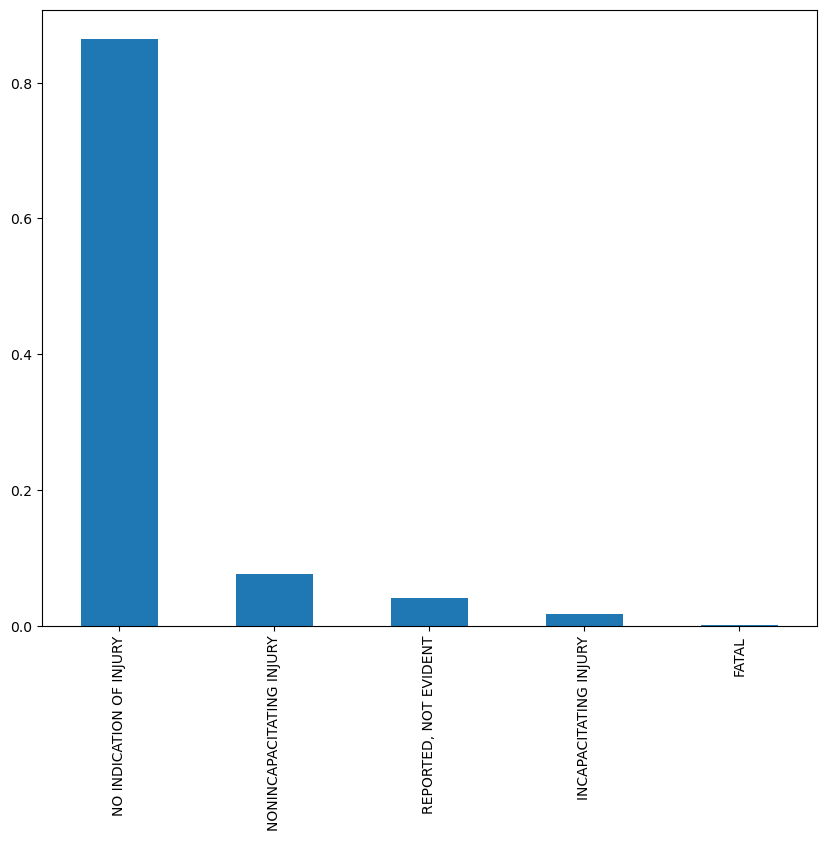

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
dfc_na_drop['MOST_SEVERE_INJURY'].value_counts(normalize = True).plot(ax=ax, kind='bar')

plt.show()

In [61]:
dfc_clean[['MOST_SEVERE_INJURY', 'LIGHTING_CONDITION']].value_counts().groupby('MOST_SEVERE_INJURY')

In [1]:
fig, ax = plt.subplots(figsize=(10,8))
dfc_clean['LIGHTING_CONDITION'].value_counts().plot(ax=ax, kind='bar')
dfc_clean['MOST_SEVERE_INJURY'].value_counts().plot(ax=ax, kind='bar')


plt.show()

NameError: name 'plt' is not defined

<font color = 'red'><b>***** NEED TO DROP 2013 and 2014 Data </b></font>

In [ ]:
dfc_clean.CRASH_YEAR.value_counts().sort_index().index

###### <font color = 'red'> HEAT MAP </font>

In [ ]:
sns.heatmap(pd.crosstab(dfc_clean.PRIM_CONTRIBUTORY_CAUSE, dfc_clean.MOST_SEVERE_INJURY), annot=True)

                                            Correlation

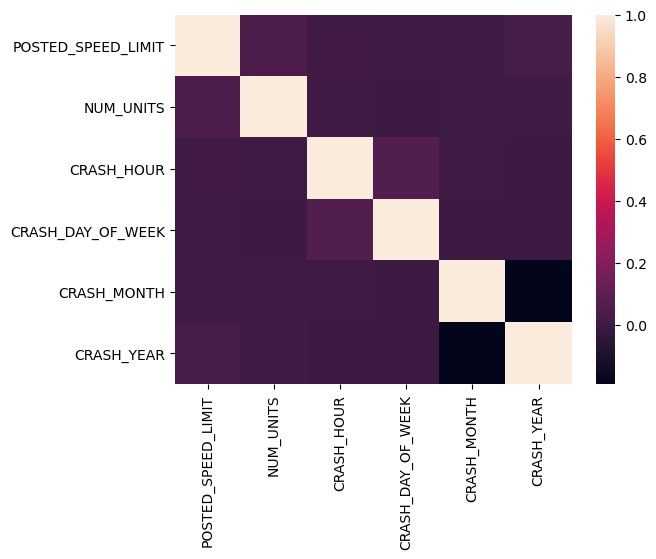

In [52]:
sns.heatmap(dfc_clean.corr());

##### <b> NOTE </b>

- <font color = 'green'>Although we cleaned the data and added some features, the data still needs more cleaning after merging the People DataFrame</font>
- Need to define the classifications
- Should consider reducing lines of data irrelevant to the analysis
- Might consider dropping columns found not relevant after merging with People DataFrame

In [ ]:
dfc_clean = dfc_na_drop[dfc_na_drop.CRASH != 2013]